# RF- Random Forest

In [22]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [23]:
dados = pd.read_excel('Base de Dados_Glauco_JP-organizados.xlsx','sequencial')
dados = dados.dropna()
dados.head(3)

,Distance,Station,Period,River type,Sector,Week,Month/Year,year,Al(dis),Al(tot),...,P(sed),Mn(sed),Clay,Silt,sandVF,sandF,sandM,sandC,sandVC,Q
0,-19.2,PT-52,Dry Period,Principal,PT-52,14,2019-04-03,2019,0.041871,1.069429,...,198.0,395.0,0.0,93.0,97.0,237.0,362.0,199.0,12.0,32.360
1,-19.2,PT-52,Dry Period,Principal,PT-52,15,2019-04-10,2019,0.123471,1.408143,...,99.4,436.0,0.0,101.0,81.0,242.0,353.0,206.0,17.0,37.270
2,-19.2,PT-52,Dry Period,Principal,PT-52,16,2019-04-17,2019,0.079400,2.120429,...,666.0,2290.0,40.0,766.0,122.0,63.0,9.0,0.0,0.0,46.154


In [24]:
dados.columns

Index(['Distance', 'Station', 'Period', 'River type', 'Sector', 'Week',
       'Month/Year', 'year', 'Al(dis)', 'Al(tot)', 'As(tot)', 'Pb(dis)',
       'Pd(tot)', 'Fe(dis)', 'Fe(tot)', 'P(dis)', 'P(tot)', 'Mn(dis)',
       'Mn(tot)', 'pH', 'T', 'Turb', 'Al(sed)', 'As(sed)', 'Pb(sed)',
       'Fe(sed)', 'P(sed)', 'Mn(sed)', 'Clay', 'Silt', 'sandVF', 'sandF',
       'sandM', 'sandC', 'sandVC', 'Q'],
      dtype='object')

r2= 0.99
r2ajust = 0.99
MAE= 0.02
RMSE= 0.02


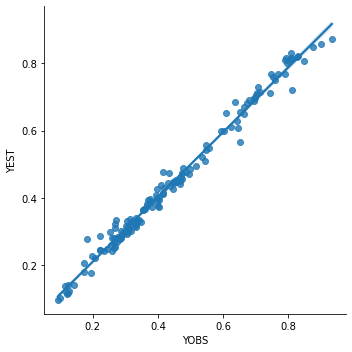

In [25]:
#dados_selec= dados.query('epoca =="Dry Season" & Sector =="Upstream"')
dados_selec= dados.query('Sector =="PT-52"')

from scipy import stats
dados_pad = stats.zscore(dados_selec.loc[:,'Al(dis)':]) # loc[ linha e coluna ]

target = 'Fe(dis)'
'''
selecao_features =['Aldis', 'Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']
'''
selecao_features =['Aldis', 'Artot', 'Pbdis', 'Pdtot', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']

selecao_features =['Al(dis)', 'Al(tot)', 'As(tot)', 'Pb(dis)',
       'Pd(tot)', 'Fe(dis)', 'Fe(tot)', 'P(dis)', 'P(tot)', 'Mn(dis)',
       'Mn(tot)', 'pH', 'T', 'Turb', 'Al(sed)', 'As(sed)', 'Pb(sed)',
       'Fe(sed)', 'P(sed)', 'Mn(sed)', 'Clay', 'Silt', 'sandVF', 'sandF',
       'sandM', 'sandC', 'sandVC', 'Q']


X = dados_pad.loc[:, selecao_features] # features = variaveis independentes = Xs 
y = dados_selec[target] # target = variável(is) dependentes = Ys

Xobs_train = X
yobs_train = y


# Modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(max_depth=7,
                                n_estimators=10,
                                max_features=10,
                                random_state=1).fit(Xobs_train, yobs_train)

# escore do TREINAMENTO
yest_train = modelo.predict(Xobs_train)


# GRÁFICO DE DESEMPENHO
import seaborn as sns
selecao_graf= pd.DataFrame({'YOBS':yobs_train, 'YEST':yest_train})
'''
[] - parentesis reto
() - parentesis (curvo)
{} - chavetas
'''
#selecao_graf
sns.lmplot(x='YOBS', y='YEST', data =selecao_graf)

#ver youtube: tutorial matplotlib ou seaborn python

# Treinamento!!
y_est = yest_train
y_obs = yobs_train

import sklearn.metrics as ms

print('r2=',round(ms.r2_score(y_obs, y_est),2))

# Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
# Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
r2=round(ms.r2_score(y_obs, y_est),2)
n=len(y_obs)
k=1 # Regressão linear = 1 parametro
print('r2ajust =',round(1-(1-r2)*(n-1)/(n-k-1),2))


# calculando pelo sklearn
print('MAE=', round(ms.mean_absolute_error(y_obs,y_est),2))
#print('MSE=', resultado.mse_total)
print('RMSE=', round(np.sqrt(ms.mean_squared_error(y_obs,y_est)),2))
#print('MSE=', (ms.mean_squared_error(y_obs,y_est)))


(0.0, 0.9)

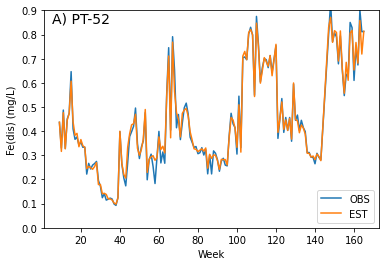

In [26]:

sns.lineplot(x=dados_selec.Week,
             y=selecao_graf.YOBS, label='OBS')
sns.lineplot(x=dados_selec.Week,
             y=selecao_graf.YEST, label='EST')
plt.legend(loc='lower right')
plt.ylabel('Fe(dis) (mg/L)')
plt.text(5,0.85,'A) PT-52', fontsize=14)
plt.ylim(0,0.9)


r2= 0.93
r2ajust = 0.93
MAE= 0.1
RMSE= 0.19


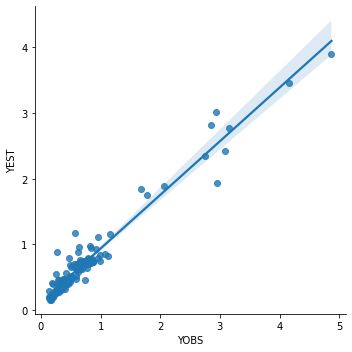

In [27]:
#dados_selec= dados.query('epoca =="Dry Season" & Sector =="Upstream"')
dados_selec= dados.query('Sector =="PT-13"')

from scipy import stats
dados_pad = stats.zscore(dados_selec.loc[:,'Al(dis)':]) # loc[ linha e coluna ]

target = 'Fe(dis)'
'''
selecao_features =['Aldis', 'Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']
'''
selecao_features =['Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']
selecao_features =['Al(dis)', 'Al(tot)', 'As(tot)', 'Pb(dis)',
       'Pd(tot)', 'Fe(tot)', 'P(dis)', 'P(tot)', 'Mn(dis)',
       'Mn(tot)', 'pH', 'T', 'Turb', 'Al(sed)', 'As(sed)', 'Pb(sed)',
       'Fe(sed)', 'P(sed)', 'Mn(sed)', 'Clay', 'Silt', 'sandVF', 'sandF',
       'sandM', 'sandC', 'sandVC', 'Q']

X = dados_pad.loc[:, selecao_features] # features = variaveis independentes = Xs 
y = dados_selec[target] # target = variável(is) dependentes = Ys

Xobs_train = X
yobs_train = y


# Modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(max_depth=7,
                                n_estimators=10,
                                max_features=10,
                                random_state=1).fit(Xobs_train, yobs_train)

# escore do TREINAMENTO
yest_train = modelo.predict(Xobs_train)


# GRÁFICO DE DESEMPENHO
import seaborn as sns
selecao_graf= pd.DataFrame({'YOBS':yobs_train, 'YEST':yest_train})
'''
[] - parentesis reto
() - parentesis (curvo)
{} - chavetas
'''
#selecao_graf
sns.lmplot(x='YOBS', y='YEST', data =selecao_graf)

#ver youtube: tutorial matplotlib ou seaborn python

# Treinamento!!
y_est = yest_train
y_obs = yobs_train

import sklearn.metrics as ms

print('r2=',round(ms.r2_score(y_obs, y_est),2))

# Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
# Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
r2=round(ms.r2_score(y_obs, y_est),2)
n=len(y_obs)
k=1 # Regressão linear = 1 parametro
print('r2ajust =',round(1-(1-r2)*(n-1)/(n-k-1),2))


# calculando pelo sklearn
print('MAE=', round(ms.mean_absolute_error(y_obs,y_est),2))
#print('MSE=', resultado.mse_total)
print('RMSE=', round(np.sqrt(ms.mean_squared_error(y_obs,y_est)),2))
#print('MSE=', (ms.mean_squared_error(y_obs,y_est)))


Text(20, 4.7, 'C) PT-13')

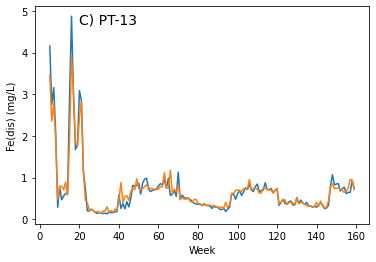

In [28]:
sns.lineplot(x=dados_selec.Week,
             y=selecao_graf.YOBS)
sns.lineplot(x=dados_selec.Week,
             y=selecao_graf.YEST)
#plt.legend(loc='lower right')
plt.ylabel('Fe(dis) (mg/L)')
plt.text(20,4.7,'C) PT-13', fontsize=14)
#plt.ylim(0,5)

r2= 0.92
r2ajust = 0.92
MAE= 0.01
RMSE= 0.02


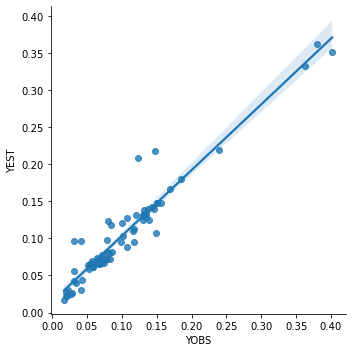

In [6]:
dados_selec= dados.query('epoca =="Dry Season" & Sector =="Upstream"')
#dados_selec= dados.query('Sector =="Anomalous"')

from scipy import stats
dados_pad = stats.zscore(dados_selec.loc[:,'Aldis':]) # loc[ linha e coluna ]

target = 'Aldis'
'''
selecao_features =['Aldis', 'Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']
'''
selecao_features =['Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']

X = dados_pad.loc[:, selecao_features] # features = variaveis independentes = Xs 
y = dados_selec[target] # target = variável(is) dependentes = Ys

Xobs_train = X
yobs_train = y


# Modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(max_depth=7,
                                n_estimators=10,
                                max_features=10,
                                random_state=1).fit(Xobs_train, yobs_train)

# escore do TREINAMENTO
yest_train = modelo.predict(Xobs_train)


# GRÁFICO DE DESEMPENHO
import seaborn as sns
selecao_graf= pd.DataFrame({'YOBS':yobs_train, 'YEST':yest_train})
'''
[] - parentesis reto
() - parentesis (curvo)
{} - chavetas
'''
#selecao_graf
sns.lmplot(x='YOBS', y='YEST', data =selecao_graf)

#ver youtube: tutorial matplotlib ou seaborn python

# Treinamento!!
y_est = yest_train
y_obs = yobs_train

import sklearn.metrics as ms

print('r2=',round(ms.r2_score(y_obs, y_est),2))

# Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
# Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
r2=round(ms.r2_score(y_obs, y_est),2)
n=len(y_obs)
k=1 # Regressão linear = 1 parametro
print('r2ajust =',round(1-(1-r2)*(n-1)/(n-k-1),2))


# calculando pelo sklearn
print('MAE=', round(ms.mean_absolute_error(y_obs,y_est),2))
#print('MSE=', resultado.mse_total)
print('RMSE=', round(np.sqrt(ms.mean_squared_error(y_obs,y_est)),2))
#print('MSE=', (ms.mean_squared_error(y_obs,y_est)))

r2= 0.92
r2ajust = 0.92
MAE= 0.03
RMSE= 0.04


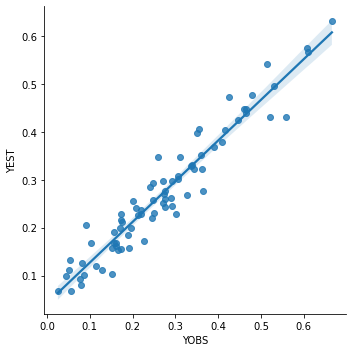

In [7]:
dados_selec= dados.query('epoca =="Rainy Season" & Sector =="Upstream"')
#dados_selec= dados.query('Sector =="Anomalous"')

from scipy import stats
dados_pad = stats.zscore(dados_selec.loc[:,'Aldis':]) # loc[ linha e coluna ]

target = 'Aldis'
'''
selecao_features =['Aldis', 'Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']
'''
selecao_features =['Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']

X = dados_pad.loc[:, selecao_features] # features = variaveis independentes = Xs 
y = dados_selec[target] # target = variável(is) dependentes = Ys

Xobs_train = X
yobs_train = y


# Modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(max_depth=7,
                                n_estimators=10,
                                max_features=10,
                                random_state=1).fit(Xobs_train, yobs_train)

# escore do TREINAMENTO
yest_train = modelo.predict(Xobs_train)


# GRÁFICO DE DESEMPENHO
import seaborn as sns
selecao_graf= pd.DataFrame({'YOBS':yobs_train, 'YEST':yest_train})
'''
[] - parentesis reto
() - parentesis (curvo)
{} - chavetas
'''
#selecao_graf
sns.lmplot(x='YOBS', y='YEST', data =selecao_graf)

#ver youtube: tutorial matplotlib ou seaborn python

# Treinamento!!
y_est = yest_train
y_obs = yobs_train

import sklearn.metrics as ms

print('r2=',round(ms.r2_score(y_obs, y_est),2))

# Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
# Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
r2=round(ms.r2_score(y_obs, y_est),2)
n=len(y_obs)
k=1 # Regressão linear = 1 parametro
print('r2ajust =',round(1-(1-r2)*(n-1)/(n-k-1),2))


# calculando pelo sklearn
print('MAE=', round(ms.mean_absolute_error(y_obs,y_est),2))
#print('MSE=', resultado.mse_total)
print('RMSE=', round(np.sqrt(ms.mean_squared_error(y_obs,y_est)),2))
#print('MSE=', (ms.mean_squared_error(y_obs,y_est)))

r2= 0.88
r2ajust = 0.88
MAE= 0.01
RMSE= 0.02


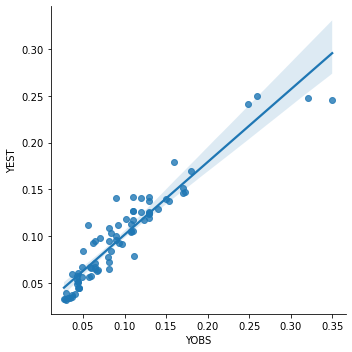

In [8]:
dados_selec= dados.query('epoca =="Dry Season" & Sector =="Anomalous"')
#dados_selec= dados.query('Sector =="Anomalous"')

from scipy import stats
dados_pad = stats.zscore(dados_selec.loc[:,'Aldis':]) # loc[ linha e coluna ]

target = 'Aldis'
'''
selecao_features =['Aldis', 'Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']
'''
selecao_features =['Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']

X = dados_pad.loc[:, selecao_features] # features = variaveis independentes = Xs 
y = dados_selec[target] # target = variável(is) dependentes = Ys

Xobs_train = X
yobs_train = y


# Modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(max_depth=7,
                                n_estimators=10,
                                max_features=10,
                                random_state=1).fit(Xobs_train, yobs_train)

# escore do TREINAMENTO
yest_train = modelo.predict(Xobs_train)


# GRÁFICO DE DESEMPENHO
import seaborn as sns
selecao_graf= pd.DataFrame({'YOBS':yobs_train, 'YEST':yest_train})
'''
[] - parentesis reto
() - parentesis (curvo)
{} - chavetas
'''
#selecao_graf
sns.lmplot(x='YOBS', y='YEST', data =selecao_graf)

#ver youtube: tutorial matplotlib ou seaborn python

# Treinamento!!
y_est = yest_train
y_obs = yobs_train

import sklearn.metrics as ms

print('r2=',round(ms.r2_score(y_obs, y_est),2))

# Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
# Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
r2=round(ms.r2_score(y_obs, y_est),2)
n=len(y_obs)
k=1 # Regressão linear = 1 parametro
print('r2ajust =',round(1-(1-r2)*(n-1)/(n-k-1),2))


# calculando pelo sklearn
print('MAE=', round(ms.mean_absolute_error(y_obs,y_est),2))
#print('MSE=', resultado.mse_total)
print('RMSE=', round(np.sqrt(ms.mean_squared_error(y_obs,y_est)),2))
#print('MSE=', (ms.mean_squared_error(y_obs,y_est)))

r2= 0.91
r2ajust = 0.91
MAE= 0.05
RMSE= 0.07


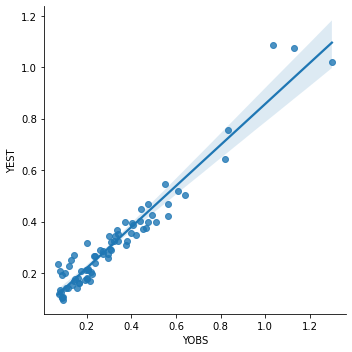

In [9]:
dados_selec= dados.query('epoca =="Rainy Season" & Sector =="Anomalous"')
#dados_selec= dados.query('Sector =="Anomalous"')

from scipy import stats
dados_pad = stats.zscore(dados_selec.loc[:,'Aldis':]) # loc[ linha e coluna ]

target = 'Aldis'
'''
selecao_features =['Aldis', 'Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']
'''
selecao_features =['Artot', 'Pbdis', 'Pdtot', 'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
                   's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil', 's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed']

X = dados_pad.loc[:, selecao_features] # features = variaveis independentes = Xs 
y = dados_selec[target] # target = variável(is) dependentes = Ys

Xobs_train = X
yobs_train = y


# Modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(max_depth=7,
                                n_estimators=10,
                                max_features=10,
                                random_state=1).fit(Xobs_train, yobs_train)

# escore do TREINAMENTO
yest_train = modelo.predict(Xobs_train)


# GRÁFICO DE DESEMPENHO
import seaborn as sns
selecao_graf= pd.DataFrame({'YOBS':yobs_train, 'YEST':yest_train})
'''
[] - parentesis reto
() - parentesis (curvo)
{} - chavetas
'''
#selecao_graf
sns.lmplot(x='YOBS', y='YEST', data =selecao_graf)

#ver youtube: tutorial matplotlib ou seaborn python

# Treinamento!!
y_est = yest_train
y_obs = yobs_train

import sklearn.metrics as ms

print('r2=',round(ms.r2_score(y_obs, y_est),2))

# Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
# Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
r2=round(ms.r2_score(y_obs, y_est),2)
n=len(y_obs)
k=1 # Regressão linear = 1 parametro
print('r2ajust =',round(1-(1-r2)*(n-1)/(n-k-1),2))


# calculando pelo sklearn
print('MAE=', round(ms.mean_absolute_error(y_obs,y_est),2))
#print('MSE=', resultado.mse_total)
print('RMSE=', round(np.sqrt(ms.mean_squared_error(y_obs,y_est)),2))
#print('MSE=', (ms.mean_squared_error(y_obs,y_est)))